In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_json('../datasets/full/complete_clean.json', orient='records')

In [11]:
data

,pattern,type
0,crteyreti=wsn&et3tf6shov=tdsviee y fum$oh3;ore...,valid
1,*;q=0.7,valid
2,nhgiopie/7.8.4.7.0,valid
3,/dyylkl.xd9cpu/4ot0ta/ts6xnrp1/hssh/a2cuerht/s...,valid
4,/2m6vlb1r37jspc/cwvv/mbar/oqrd0/msc/etceebwgi/...,valid
...,...,...
90248,<img onpointerenter=alert(1)>xss</img>,xss
90249,"<source onbeforepaste=""alert(1)"" contenteditab...",xss
90250,"<div draggable=""true"" contenteditable>drag me<...",xss
90251,"<li><cite id=""citerefdomingos2015"" class=""cita...",valid


In [12]:
counts = data['type'].value_counts()

<Axes: ylabel='count'>

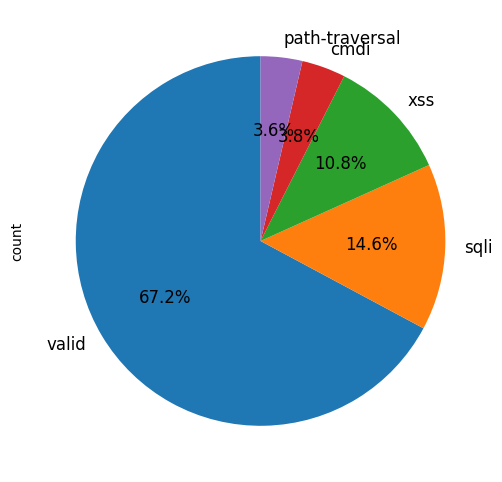

In [15]:
counts.plot.pie(figsize=(6, 6), autopct='%1.1f%%', startangle=90, fontsize=12)

In [16]:
X = data['pattern'].to_numpy().astype(str)
y = data['type'].to_numpy().astype(str)

In [17]:
print(len(X))
print(len(y))

90253
90253


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

In [20]:
trainX, testX, trainY, testY = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

np.savez('dataset', trainX=trainX, testX=testX, trainY=trainY, testY=testY)

In [23]:
pipe = make_pipeline(TfidfVectorizer(input='content', lowercase=True, analyzer='char', max_features=1024), SVC())

param_grid = {'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 4)], 'svc__C':[1,10], 'svc__kernel': ['linear', 'rbf']}

grid = GridSearchCV(pipe, param_grid, cv=2, verbose=4)

grid.fit(trainX, trainY)

Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.959 total time= 1.3min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 1);, score=0.960 total time= 1.1min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.985 total time= 3.1min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 2);, score=0.986 total time= 2.9min
[CV 1/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.986 total time= 3.2min
[CV 2/2] END svc__C=1, svc__kernel=linear, tfidfvectorizer__ngram_range=(1, 4);, score=0.987 total time= 4.6min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.982 total time= 1.1min
[CV 2/2] END svc__C=1, svc__kernel=rbf, tfidfvectorizer__ngram_range=(1, 1);, score=0.983 total time= 1.1min
[CV 1/2] END svc__C=1, svc__kernel=rbf, tfidfvect

c:\Users\Lenovo\anaconda3\envs\venv\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(analyzer='char',
                                                        max_features=1024)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [1, 10], 'svc__kernel': ['linear', 'rbf'],
                         'tfidfvectorizer__ngram_range': [(1, 1), (1, 2),
                                                          (1, 4)]},
             verbose=4)

In [24]:
grid.score(testX, testY)

0.9960113455061159

In [25]:
from sklearn.metrics import classification_report

preds = grid.predict(testX)

print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       0.98      0.97      0.98       865
path-traversal       0.99      0.97      0.98       822
          sqli       1.00      0.99      0.99      3288
         valid       1.00      1.00      1.00     15156
           xss       1.00      1.00      1.00      2433

      accuracy                           1.00     22564
     macro avg       0.99      0.99      0.99     22564
  weighted avg       1.00      1.00      1.00     22564



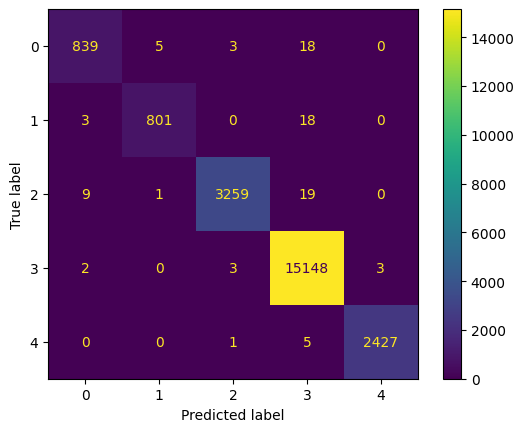

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming grid is your trained model and testX, testY are your test data
y_pred = grid.predict(testX)
cm = confusion_matrix(testY, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [28]:
grid.best_params_

{'svc__C': 10, 'svc__kernel': 'rbf', 'tfidfvectorizer__ngram_range': (1, 4)}

In [29]:
pipe = make_pipeline(TfidfVectorizer(input = 'content', lowercase = True, analyzer = 'char', max_features = 1024, ngram_range = (1, 2)), SVC(C = 10, kernel = 'rbf'))

pipe.fit(trainX, trainY)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='char', max_features=1024,
                                 ngram_range=(1, 2))),
                ('svc', SVC(C=10))])

In [30]:
pipe.score(testX, testY)

0.995789753589789

In [31]:
preds = pipe.predict(testX)

print(classification_report(testY, preds))

                precision    recall  f1-score   support

          cmdi       0.99      0.98      0.98       865
path-traversal       1.00      0.97      0.98       822
          sqli       1.00      0.99      0.99      3288
         valid       1.00      1.00      1.00     15156
           xss       1.00      1.00      1.00      2433

      accuracy                           1.00     22564
     macro avg       0.99      0.99      0.99     22564
  weighted avg       1.00      1.00      1.00     22564



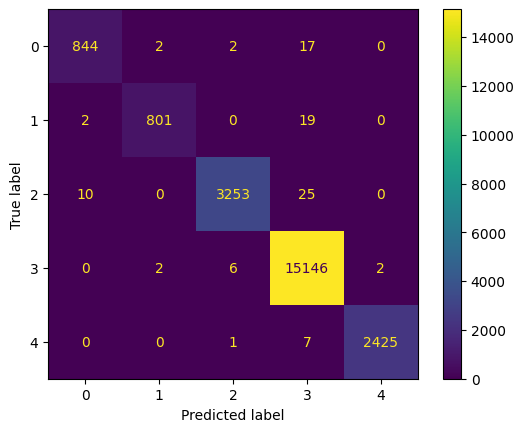

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming pipe is your trained model and testX, testY are your test data
y_pred = pipe.predict(testX)
cm = confusion_matrix(testY, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [34]:
import joblib

joblib.dump(pipe, 'predictor.joblib')

['predictor.joblib']